In [1]:
from fig3_utils import *
%load_ext autoreload
%autoreload 2

In [2]:
# Then in each visualization function, replace the color generation with:
K=21
signature_colors = get_signature_colors(K)  

In [3]:
# Example Usage
results_dir = '/Users/sarahurbut/Dropbox/resultshighamp/results/'
sig_refs_file = '/Users/sarahurbut/Dropbox/data_for_running/reference_trajectories.pt'

target_diseases = [17, 112]  # Example indices - verify these match your disease codes of interest
min_cond = 8 # Minimum number of total diseases a patient must have
n_plots = 20  # How many example patients to plot


In [ ]:

# Check if required files/directories exist before running
if not os.path.isdir(results_dir):
    print(f"ERROR: Results directory not found: {results_dir}")
elif not os.path.exists(sig_refs_file):
    print(f"ERROR: Signature reference file not found: {sig_refs_file}")
else:
    # Run the analysis and plotting
    essentials_dict, figures_list = plot_multi_morbid_dynamics_from_batches(
        results_base_dir=results_dir,
        target_disease_indices=target_diseases,
        signature_refs_path=sig_refs_file,
        min_conditions=min_cond,
        n_patients_to_plot=n_plots,
        require_all_targets=True 
    )

     #You can access reference data via essentials_dict
    # To save the figures:
    # 
for i, fig in enumerate(figures_list):
    fig.savefig(f'/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure3/figure3_patient_example_{i+1}.pdf', dpi=300)

In [1]:
from fig3_utils import *
%reload_ext autoreload
%autoreload 2


# --- How to use it ---
model_path='/Users/sarahurbut/Dropbox/resultshighamp/results/output_0_10000/model.pt'

checkpoint = torch.load(model_path)
disease_names = checkpoint['disease_names']
lambda_values_np = checkpoint['model_state_dict']['lambda_'].detach().cpu().numpy()
phi_values_np = checkpoint['model_state_dict']['phi'].detach().cpu().numpy()
disease_names = checkpoint['disease_names']
if isinstance(disease_names, pd.DataFrame):
    disease_names = disease_names.iloc[:, 0].tolist()
elif isinstance(disease_names, pd.Index):
    disease_names = disease_names.tolist()
elif isinstance(disease_names, pd.Series):
    disease_names = disease_names.tolist()


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48835/2336204092.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


In [4]:
phi_values_np[5,112,:]

array([-12.467401 , -12.41986  , -12.255273 , -11.98758  , -11.637319 ,
       -11.227342 , -10.780622 , -10.316376 ,  -9.850382 ,  -9.392701 ,
        -8.949572 ,  -8.524326 ,  -8.1177635,  -7.729254 ,  -7.360128 ,
        -7.010493 ,  -6.6804495,  -6.3696356,  -6.0863934,  -5.825046 ,
        -5.5902505,  -5.386091 ,  -5.210116 ,  -5.064313 ,  -4.9444222,
        -4.8545294,  -4.787752 ,  -4.739635 ,  -4.7098126,  -4.695075 ,
        -4.6819324,  -4.676618 ,  -4.668289 ,  -4.6614413,  -4.645118 ,
        -4.620666 ,  -4.595276 ,  -4.5632515,  -4.5246353,  -4.4968214,
        -4.4703994,  -4.454491 ,  -4.460848 ,  -4.497118 ,  -4.555665 ,
        -4.65198  ,  -4.7823353,  -4.952    ,  -5.158089 ,  -5.39795  ,
        -5.671024 ,  -5.975345 ], dtype=float32)

Individual 4517 has highest average loading on signature 5
Calculating population theta...
Saved figure to individual_vs_population_cv.pdf


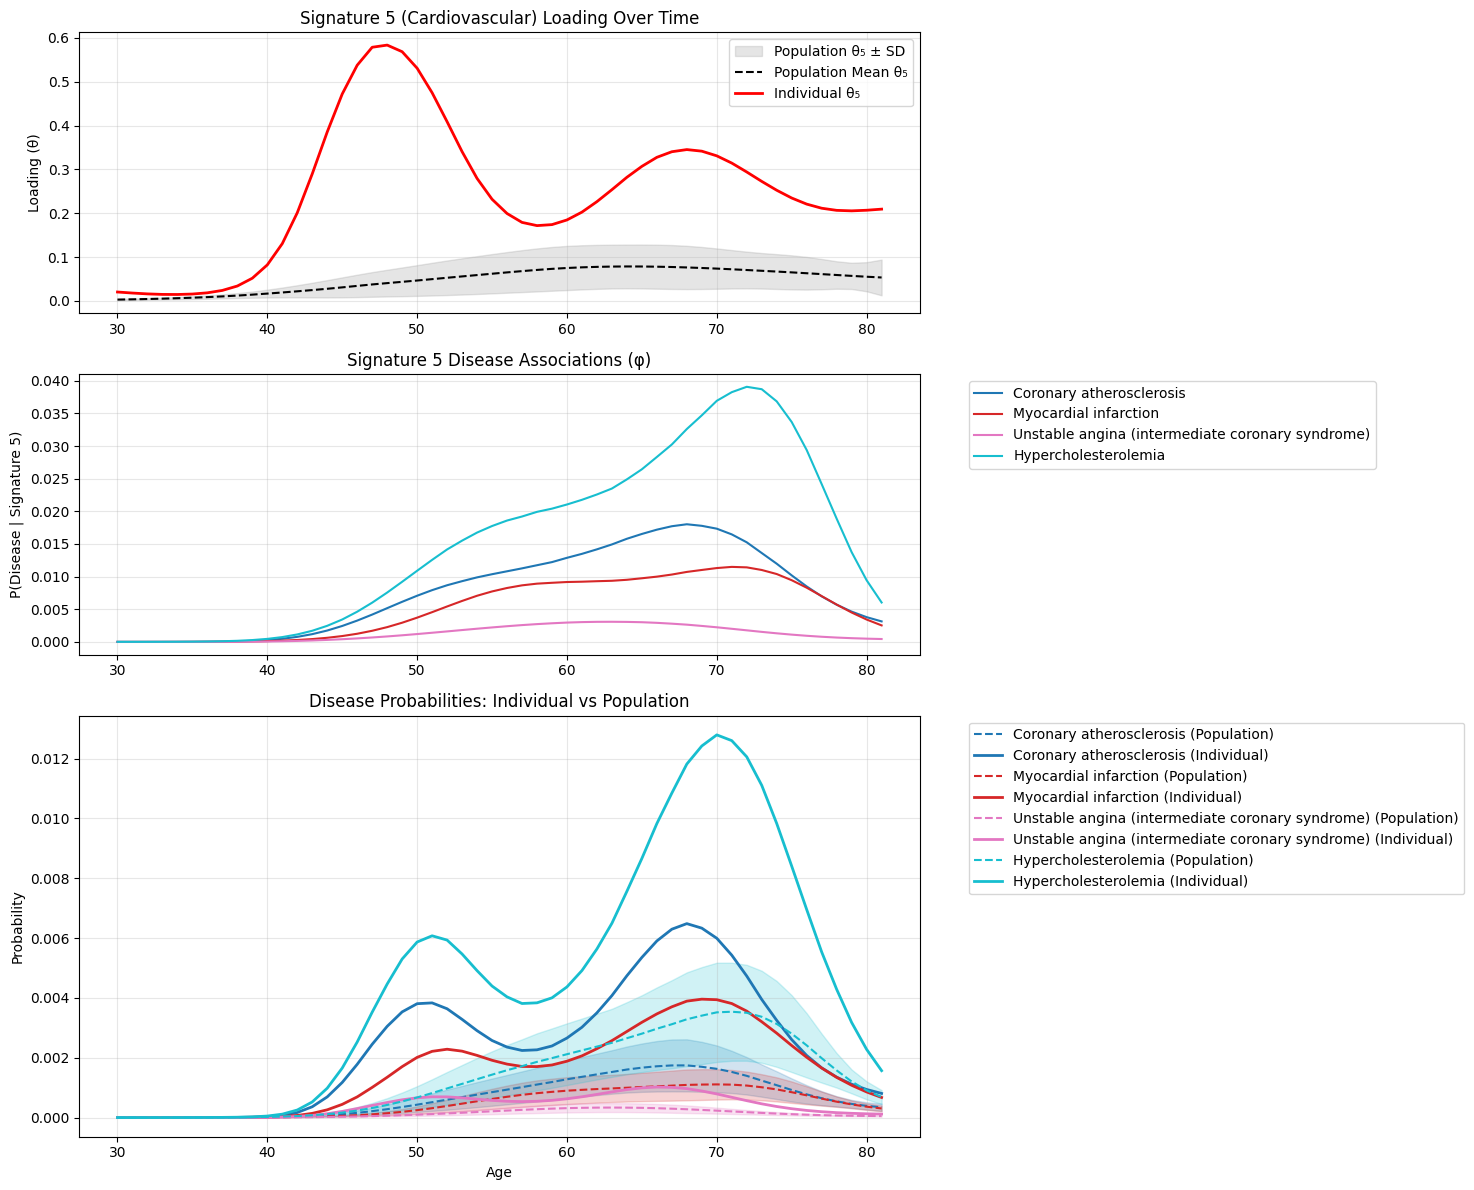

In [15]:

N, K, T = lambda_values_np.shape
theta = np.zeros_like(lambda_values_np)
for i in range(N):
    for t in range(T):
        exp_lambda = np.exp(lambda_values_np[i, :, t])
        theta[i, :, t] = exp_lambda / np.sum(exp_lambda)

# Get average loading on signature 5 for each individual
sig5_loading_avg = np.mean(theta[:, 5, :], axis=1)
high_sig5_individual = np.argmax(sig5_loading_avg)
print(f"Individual {high_sig5_individual} has highest average loading on signature 5")

# Example usage:
cv_diseases = [
    "Coronary atherosclerosis",
    
    "Myocardial infarction",
    "Unstable angina (intermediate coronary syndrome)",
    "Hypercholesterolemia"
    
]


# Get indices of these diseases
disease_indices = [disease_names.index(d) for d in cv_diseases]

visualize_individual_vs_population(
    lambda_values_np=lambda_values_np,
    phi_values_np=phi_values_np,
    individual_idx=high_sig5_individual,
    cv_diseases=cv_diseases,
    disease_indices=disease_indices,
    time_points=np.arange(30, 30 + T),
    kappa=1.0,
    output_path='individual_vs_population_cv.pdf'
)

Saved figure to contribution_breakdown_Myocardial_infarction_ind110.pdf


In [25]:

individual_to_plot = high_sig5_individual
# Define the target disease and find its index
target_disease_name = "Myocardial infarction"
try:
    target_disease_idx = disease_names.index(target_disease_name)

    # Generate the plot
    visualize_disease_contribution_breakdown(
        lambda_values_np=lambda_values_np,
        phi_values_np=phi_values_np,
        individual_idx=100,
        disease_idx=target_disease_idx,
        disease_name=target_disease_name,
        time_points=np.arange(30, 30 + T), # Example time points
        kappa=checkpoint['model_state_dict']['kappa'], # Replace with actual kappa if available
        output_path=f'/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure3/contribution_breakdown_{target_disease_name.replace(" ","_")}_ind{individual_to_plot}.pdf'
    )
except ValueError:
    print(f"Error: Could not find disease '{target_disease_name}' in the disease list.")

NameError: name 'high_sig5_individual' is not defined

In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl

tab20 = plt.get_cmap('tab20', 20)
for i in range(tab20.N):
    rgba = tab20(i)
    print(mpl.colors.rgb2hex(rgba))

#1f77b4
#aec7e8
#ff7f0e
#ffbb78
#2ca02c
#98df8a
#d62728
#ff9896
#9467bd
#c5b0d5
#8c564b
#c49c94
#e377c2
#f7b6d2
#7f7f7f
#c7c7c7
#bcbd22
#dbdb8d
#17becf
#9edae5


In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pandas as pd
import torch
from typing import List, Optional
from matplotlib.lines import Line2D

def get_signature_colors(K):
    """
    Returns the specific BrewerPlus color palette for K signatures.
    """
    # BrewerPlus colors as provided
    brewer_plus_colors = [
        "#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C", "#FB9A99", 
        "#E31A1C", "#FDBF6F", "#FF7F00", "#CAB2D6", "#6A3D9A", 
        "#FFFF99", "#B15928", "#1ff8ff", "#1B9E77", "#D95F02", 
        "#7570B3", "#E7298A", "#66A61E", "#E6AB02", "#A6761D", 
        "#666666", "#4b6a53", "#b249d5", "#7edc45", "#5c47b8", 
        "#cfd251", "#ff69b4", "#69c86c", "#cd3e50", "#83d5af", 
        "#da6130", "#5e79b2", "#c29545", "#532a5a", "#5f7b35", 
        "#c497cf", "#773a27", "#7cb9cb", "#594e50", "#d3c4a8", 
        "#c17e7f", "lightgrey"
    ]
    
    # If K is greater than available colors, cycle through them
    if K > len(brewer_plus_colors):
        return [brewer_plus_colors[i % len(brewer_plus_colors)] for i in range(K)]
    else:
        return brewer_plus_colors[:K]

def visualize_disease_contribution_breakdown_new(
    lambda_values_np: np.ndarray,  # (N, K, T)
    phi_values_np: np.ndarray,     # (K, D, T)
    individual_idx: int,
    disease_idx: int,              
    disease_name: str,             
    time_points: np.ndarray,       
    signature_names: Optional[List[str]] = None,
    kappa: float = 1.0,
    output_path: Optional[str] = None
):
    """
    Visualize how all signatures contribute to a specific disease's probability,
    with a heatmap showing signature-disease associations over time.
    Uses consistent color scheme across all plots.
    """
    # Convert inputs to numpy if they're torch tensors
    if torch.is_tensor(lambda_values_np):
        lambda_values_np = lambda_values_np.detach().cpu().numpy()
    if torch.is_tensor(phi_values_np):
        phi_values_np = phi_values_np.detach().cpu().numpy()
    if torch.is_tensor(kappa):
        kappa = kappa.item()

    N, K, T = lambda_values_np.shape

    # --- Calculations ---
    # Calculate theta for all individuals and the population average
    theta_all = np.zeros((N, K, T))
    for i in range(N):
        exp_lambda = np.exp(lambda_values_np[i, :, :])
        theta_all[i, :, :] = exp_lambda / np.sum(exp_lambda, axis=0, keepdims=True)
    
    # Population statistics
    theta_pop_mean = np.mean(theta_all, axis=0)  # (K, T)
    theta_pop_std = np.std(theta_all, axis=0)    # (K, T)

    # Individual theta
    theta_individual = theta_all[individual_idx]  # (K, T)

    # Get raw phi values for the target disease
    phi_disease = phi_values_np[:, disease_idx, :]  # (K, T)
    
    # Calculate contributions using sigmoid of phi
    phi_probs_disease = 1 / (1 + np.exp(-phi_disease))
    contributions = theta_individual * phi_probs_disease
    total_latent_risk = np.sum(contributions, axis=0)  # (T,)
    total_prob_disease = kappa * total_latent_risk     # (T,)
    total_prob_disease = np.minimum(1.0, np.maximum(0.0, total_prob_disease))

    # Scale contributions
    scaled_contributions = contributions.copy()  # (K, T)
    with np.errstate(divide='ignore', invalid='ignore'):
        scaling_factor = np.divide(total_prob_disease, total_latent_risk)  # (T,)
        scaling_factor = np.where(np.isfinite(scaling_factor), scaling_factor, 0.0)  # (T,)
        scaled_contributions = scaled_contributions * scaling_factor[None, :]  # Broadcasting (T,) to (K, T)
    
    if signature_names is None:
        signature_names = [f"Signature {k}" for k in range(K)]

    # Print the top 5 contributing signatures for debugging
    max_contribs = np.max(scaled_contributions, axis=1)
    top_indices = np.argsort(-max_contribs)[:5]
    print("Top 5 contributing signatures by max contribution:")
    for idx in top_indices:
        print(f"  Signature {idx}: Max contrib = {max_contribs[idx]:.6f}")

    # Create the figure
    fig = plt.figure(figsize=(12, 15))
    gs = gridspec.GridSpec(3, 1, height_ratios=[1.5, 1.2, 2])
    
    # Use the BrewerPlus color palette
    palette = get_signature_colors(K)

    # --- Panel 1: Population and Individual Signature Loadings (theta) ---
    ax1 = fig.add_subplot(gs[0])
    for k in range(K):
        ax1.plot(time_points, theta_pop_mean[k], '--', color=palette[k], 
                 alpha=0.5, label=f'Pop. Mean {signature_names[k]}')
        ci = theta_pop_std[k]
        ax1.fill_between(time_points, 
                        theta_pop_mean[k] - ci,
                        theta_pop_mean[k] + ci,
                        color=palette[k], alpha=0.1)
        ax1.plot(time_points, theta_individual[k], '-', color=palette[k],
                 linewidth=2, label=f'Individual {signature_names[k]}')

    ax1.set_title(f'Signature Loadings (θ): Individual {individual_idx} vs Population', pad=15)
    ax1.set_ylabel('Loading (θ)')
    ax1.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize='small')
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(labelbottom=False)

    # --- Panel 2: Signature-Disease Association Heatmap ---
    ax2 = fig.add_subplot(gs[1])
    df_heatmap = pd.DataFrame(
        phi_disease,
        index=signature_names,
        columns=time_points
    )
    # Use a consistent colormap for the heatmap
    sns.heatmap(df_heatmap, 
                cmap='RdBu_r',
                ax=ax2,
                cbar_kws={'label': 'log-odds(Disease | Signature k, Age t)'})
    ax2.set_title(f'Temporal Signature Associations for {disease_name}', pad=15)
    ax2.set_xlabel('')  # Remove x-label since it's shared
    ax2.set_ylabel('Signature')
    ax2.tick_params(rotation=0)

    # --- Panel 3: Stacked Contribution to Disease Probability ---
    ax3 = fig.add_subplot(gs[2], sharex=ax1)
    
    # Sort contributions by their maximum value (smallest to largest)
    max_contribs = np.max(scaled_contributions, axis=1)
    sorted_indices = np.argsort(max_contribs)
    sorted_contributions = scaled_contributions[sorted_indices]
    sorted_names = [signature_names[i] for i in sorted_indices]
    sorted_colors = [palette[i] for i in sorted_indices]
    
    # Create the stackplot with sorted data
    ax3.stackplot(time_points, sorted_contributions, labels=sorted_names, 
                 colors=sorted_colors, alpha=0.7)
    
    # Add the total probability line
    ax3.plot(time_points, total_prob_disease, 'k--', linewidth=2, 
             label='Total Risk ($\pi_{idt}$)')
    
    ax3.set_title(f'Signature Contributions to Risk of "{disease_name}"', pad=15)
    ax3.set_xlabel('Age')
    ax3.set_ylabel('Risk ($\pi$)')
    ax3.legend(loc='center left', bbox_to_anchor=(1.02, 0.5), fontsize='small')
    ax3.grid(True, alpha=0.3)
    
    plot_max_y = (np.max(total_prob_disease) * 1.1) if np.any(total_prob_disease > 0) else 0.1
    ax3.set_ylim(0, plot_max_y)

    plt.suptitle(f"Probability Breakdown for '{disease_name}' - Individual {individual_idx}", 
                fontsize=16, y=0.99)
    plt.tight_layout(rect=[0, 0, 0.88, 0.97])

    if output_path:
        plt.savefig(output_path, bbox_inches='tight', dpi=300)
        print(f"Saved figure to {output_path}")
        plt.close(fig)
    else:
        plt.show()
    
    return fig

In [43]:

print(phi_values_np[4,112,:])
print(phi_values_np[5,112,:])


[-15.430001  -15.297134  -15.053202  -14.716331  -14.310247  -13.860888
 -13.39305   -12.927766  -12.480753  -12.06206   -11.676648  -11.325426
 -11.006635  -10.716993  -10.452756  -10.210271   -9.986389   -9.778663
  -9.585333   -9.405192   -9.237716   -9.082624   -8.939836   -8.809436
  -8.691295   -8.58531    -8.491152   -8.408352   -8.336205   -8.2739315
  -8.220577   -8.175235   -8.136893   -8.104802   -8.078319   -8.057076
  -8.041075   -8.030613   -8.026351   -8.029182   -8.040067   -8.0598755
  -8.089084   -8.127575   -8.174348   -8.227426   -8.283795   -8.339569
  -8.390303   -8.431488   -8.45905    -8.469952 ]
[-12.467401  -12.41986   -12.255273  -11.98758   -11.637319  -11.227342
 -10.780622  -10.316376   -9.850382   -9.392701   -8.949572   -8.524326
  -8.1177635  -7.729254   -7.360128   -7.010493   -6.6804495  -6.3696356
  -6.0863934  -5.825046   -5.5902505  -5.386091   -5.210116   -5.064313
  -4.9444222  -4.8545294  -4.787752   -4.739635   -4.7098126  -4.695075
  -4.681932

Top 5 contributing signatures by max contribution:
  Signature 5: Max contrib = 0.001624
  Signature 7: Max contrib = 0.000125
  Signature 16: Max contrib = 0.000120
  Signature 3: Max contrib = 0.000089
  Signature 1: Max contrib = 0.000085
Saved figure to /Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure3/contribution_breakdown_Myocardial_infarction_ind100.pdf


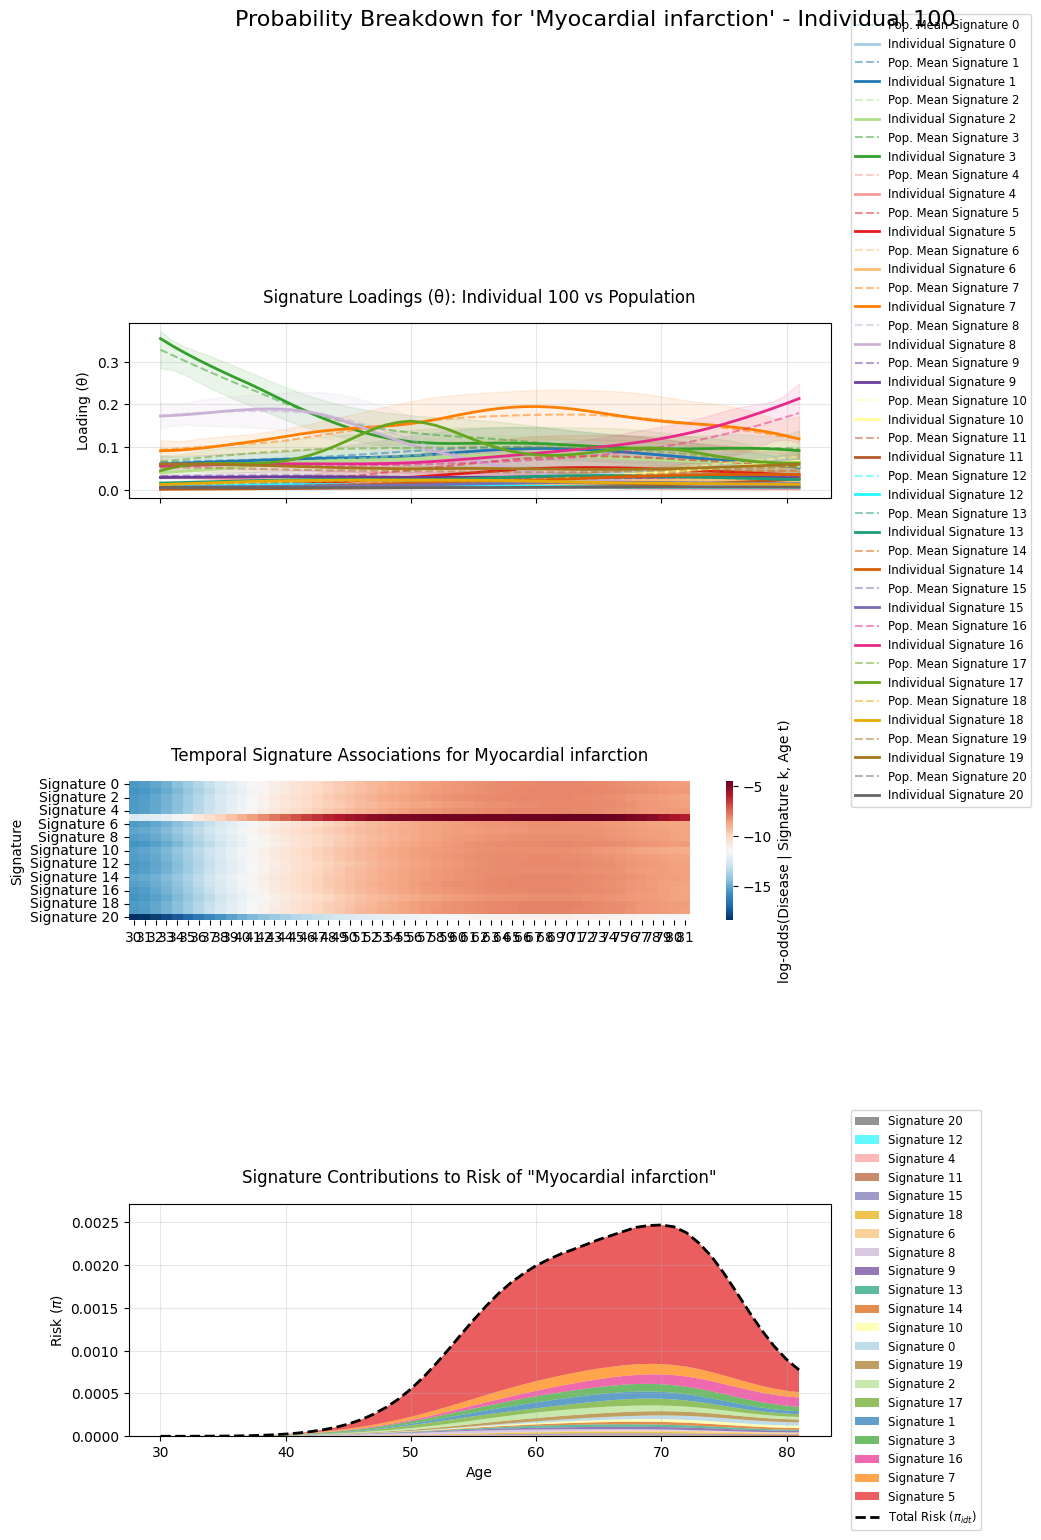

In [46]:
# Use this mapping if signatures 4 and 5 are swapped in the visualization
signature_mapping = {4: 5, 5: 4}  # Display index 4 should show data from index 5, and vice versa

visualize_disease_contribution_breakdown_new(
    lambda_values_np=lambda_values_np,
    phi_values_np=phi_values_np,
    individual_idx=100,
    disease_idx=target_disease_idx,
    disease_name=target_disease_name,
    time_points=np.arange(30, 30 + T),
   
    kappa=checkpoint['model_state_dict']['kappa'],
    output_path=f'/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure3/contribution_breakdown_{target_disease_name.replace(" ","_")}_ind{individual_to_plot}.pdf'
)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

tab20 = plt.get_cmap('tab20', 20)
for i in range(tab20.N):
    rgba = tab20(i)
    print(mpl.colors.rgb2hex(rgba))

#1f77b4
#aec7e8
#ff7f0e
#ffbb78
#2ca02c
#98df8a
#d62728
#ff9896
#9467bd
#c5b0d5
#8c564b
#c49c94
#e377c2
#f7b6d2
#7f7f7f
#c7c7c7
#bcbd22
#dbdb8d
#17becf
#9edae5


In [5]:

disease_info = {
    'name': 'Myocardial Infarction',
    'index': 112,  # Verify this is the correct index
    'early_threshold': 50,
    'late_threshold': 70
}

# Run the analysis
# Example usage:

early_onset_indices, late_onset_indices = analyze_age_onset_patterns_across_batches(
    results_base_dir='/Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/',
    disease_index=112,  # MI
    early_threshold=55,
    late_threshold=70,
    output_path='/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure3/mi_onset_patterns_all_batches.pdf'
)



Searching for batch directories in: /Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/

--- Scanning 40 Batches for Early/Late Onset Patterns ---
Processing batch output_0_10000...
Processing batch output_10000_20000...


/Users/sarahurbut/aladynoulli2/pyScripts/fig3_utils.py:1315: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_data = torch.load(batch_model_path, map_location='cpu')


Processing batch output_20000_30000...
Processing batch output_30000_40000...
Processing batch output_40000_50000...
Processing batch output_50000_60000...
Processing batch output_60000_70000...
Processing batch output_70000_80000...
Processing batch output_80000_90000...
Processing batch output_90000_100000...
Processing batch output_100000_110000...
Processing batch output_110000_120000...
Processing batch output_120000_130000...
Processing batch output_130000_140000...
Processing batch output_140000_150000...
Processing batch output_150000_160000...
Processing batch output_160000_170000...
Processing batch output_170000_180000...
Processing batch output_180000_190000...
Processing batch output_190000_200000...
Processing batch output_200000_210000...
Processing batch output_210000_220000...
Processing batch output_220000_230000...
Processing batch output_230000_240000...
Processing batch output_240000_250000...
Processing batch output_250000_260000...
Processing batch output_260000_

In [16]:
# Run the analysis with stats
early_onset_indices, late_onset_indices, stats = analyze_age_onset_patterns_across_batches(
    results_base_dir='/Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/',
    disease_index=112,  # MI
    early_threshold=55,
    late_threshold=70,
    output_path='/Users/sarahurbut/aladynoulli2/pyScripts/figures_for_science/figure3/mi_onset_patterns_all_batches.pdf'
)

# Print the statistics
print("Quantitative Results for Signature 5 (Cardiovascular):")
print(f"Early-onset MI (n={len(early_onset_indices)}):")
print(f"  Peak contribution: {stats['early_peak_contribution']*100:.1f}% at age {stats['early_peak_age']:.1f}")
print(f"  Mean diagnosis age: {stats['early_diagnosis_age']:.1f}")
print(f"  Velocity before MI (last 3 years): {stats['early_velocity_pre_mi']:.3f}/year")
print(f"  Max velocity in 5-year window: {stats['early_max_velocity']:.3f}/year")

print(f"Late-onset MI (n={len(late_onset_indices)}):")
print(f"  Peak contribution: {stats['late_peak_contribution']*100:.1f}% at age {stats['late_peak_age']:.1f}")
print(f"  Mean diagnosis age: {stats['late_diagnosis_age']:.1f}")
print(f"  Velocity before MI (last 3 years): {stats['late_velocity_pre_mi']:.3f}/year")
print(f"  Max velocity in 5-year window: {stats['late_max_velocity']:.3f}/year")

if stats['late_velocity_pre_mi'] != 0:
    print(f"Velocity ratio (early/late): {stats['early_velocity_pre_mi']/stats['late_velocity_pre_mi']:.1f}-fold higher in early onset")
else:
    print("Velocity ratio: undefined (late velocity is zero)")

Searching for batch directories in: /Users/sarahurbut/Library/CloudStorage/Dropbox/resultshighamp/results/

--- Scanning 40 Batches for Early/Late Onset Patterns ---
Processing batch output_0_10000...
Processing batch output_10000_20000...


/Users/sarahurbut/aladynoulli2/pyScripts/fig3_utils.py:1316: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  Y_batch = model_data['Y']


Processing batch output_20000_30000...
Processing batch output_30000_40000...
Processing batch output_40000_50000...
Processing batch output_50000_60000...
Processing batch output_60000_70000...
Processing batch output_70000_80000...
Processing batch output_80000_90000...
Processing batch output_90000_100000...
Processing batch output_100000_110000...
Processing batch output_110000_120000...
Processing batch output_120000_130000...
Processing batch output_130000_140000...
Processing batch output_140000_150000...
Processing batch output_150000_160000...
Processing batch output_160000_170000...
Processing batch output_170000_180000...
Processing batch output_180000_190000...
Processing batch output_190000_200000...
Processing batch output_200000_210000...
Processing batch output_210000_220000...
Processing batch output_220000_230000...
Processing batch output_230000_240000...
Processing batch output_240000_250000...
Processing batch output_250000_260000...
Processing batch output_260000_

In [11]:
E_enrollment=torch.load('/Users/sarahurbut/Dropbox/data_for_running/E_enrollment_full.pt')
E_enrollment.shape
torch.save(E_enrollment[:10000], 'E_enrollment_first10k.pt')
pd.DataFrame(E_enrollment[:10000]).to_csv('E_enrollment_first10k.csv', index=False)



/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48835/514933350.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  E_enrollment=torch.load('/Users/sarahurbut/Dro

In [12]:


E_full=torch.load('/Users/sarahurbut/Dropbox/data_for_running/E_matrix.pt')

torch.save(E_full[:10000], 'E_full_first10k.pt')
pd.DataFrame(E_full[:10000]).to_csv('E_full_first10k.csv', index=False)



/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_48835/585515156.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  E_full=torch.load('/Users/sarahurbut/Dropbox/d

Starting analysis for disease 66 across all batches...

Loading batch 1 model for reference...
Analyzing Major depressive disorder
Loaded reference_theta from reference_thetas.csv: (21, 52)

Processing batch 1/40 (patients 0-10000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig3_utils.py:1501: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyS

Found 723 patients in batch 1

Processing batch 2/40 (patients 10000-20000)
Found 744 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 716 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 782 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 770 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 798 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 801 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 771 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 753 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 788 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 775 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 771 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 806 patients in batch 13

Processing batch 14/40 (patients 130000-14

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

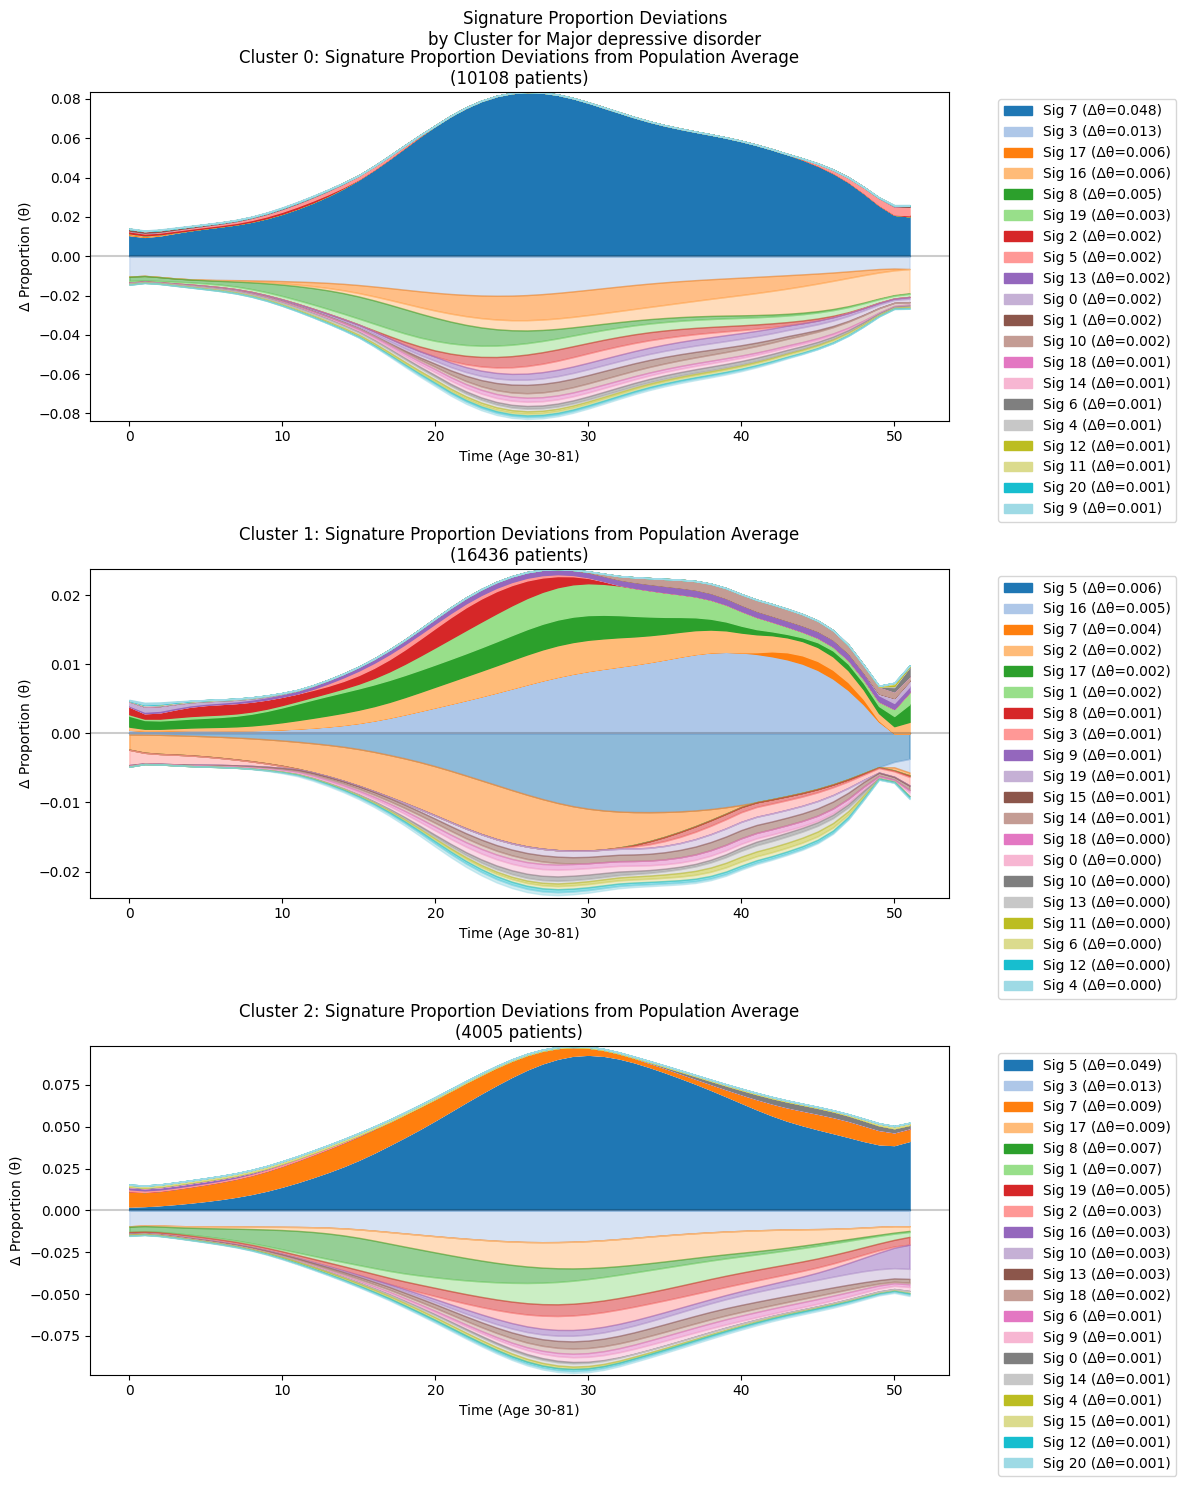

In [6]:

from fig3_utils import *
# Define the disease to analyz
# Usage:
# For myocardial infarction (assuming it's disease index 66):
fig = plot_disease_signature_clusters_all_batches(66, n_clusters=3, n_top_sigs=20,n_batches=40)


In [ ]:

# For other diseases:
fig = plot_disease_signature_clusters_all_batches(112, n_clusters=3, n_top_sigs=20,n_batches=40)


In [12]:

from fig3_utils import *
%reload_ext autoreload
%autoreload 2


In [14]:
import pandas as pd
reference_theta = pd.read_csv("reference_thetas.csv", header=0).values  # header=0 skips the first row as header
print(reference_theta.shape)  # Should be (21, 52)

(21, 52)


Starting analysis for disease 17 across all batches...

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast
Loaded reference_theta from reference_thetas.csv: (21, 52)

Processing batch 1/40 (patients 0-10000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig3_utils.py:1335: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyS

Found 423 patients in batch 1

Processing batch 2/40 (patients 10000-20000)
Found 401 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 454 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 464 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 419 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 461 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 424 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 471 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 408 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 464 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 457 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 443 patients in batch 13

Processing batch 14/40 (patients 130000-14

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

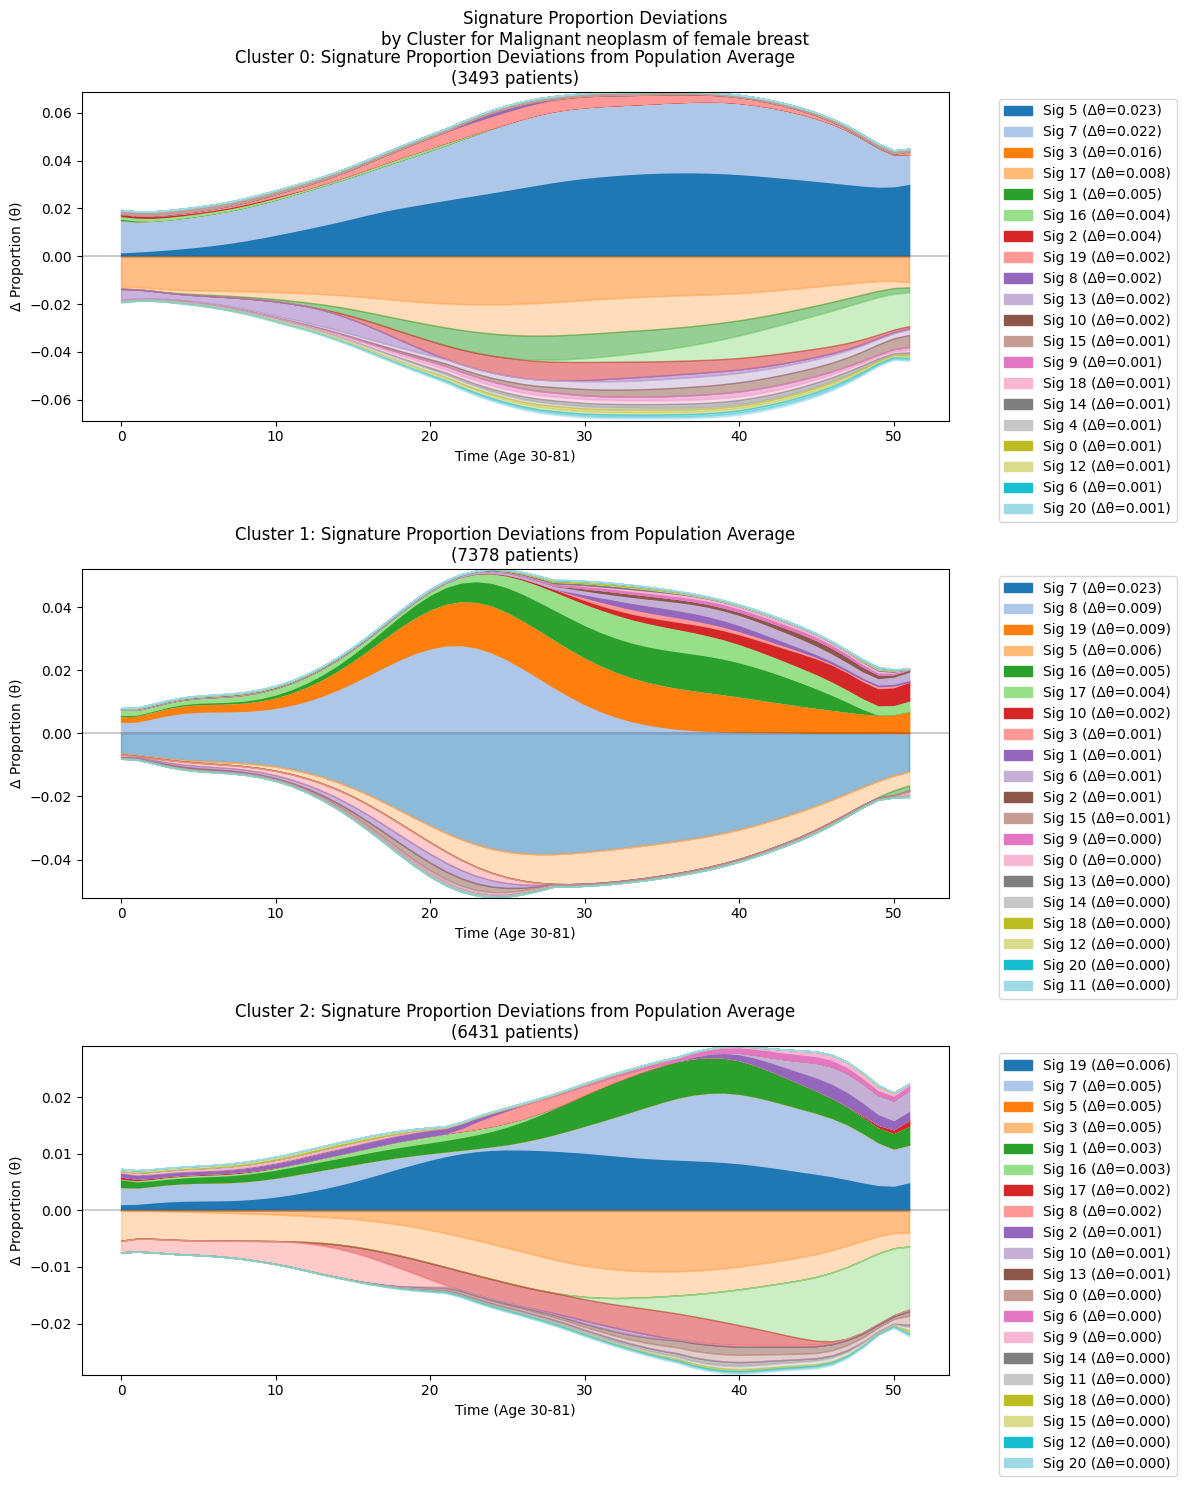

In [15]:

fig = plot_disease_signature_clusters_all_batches(17, n_clusters=3, n_top_sigs=20,n_batches=40)

In [23]:
import matplotlib.pyplot as plt
import matplotlib as mpl

tab20 = plt.get_cmap('tab20', 20)
for i in range(tab20.N):
    rgba = tab20(i)
    print(mpl.colors.rgb2hex(rgba))

#1f77b4
#aec7e8
#ff7f0e
#ffbb78
#2ca02c
#98df8a
#d62728
#ff9896
#9467bd
#c5b0d5
#8c564b
#c49c94
#e377c2
#f7b6d2
#7f7f7f
#c7c7c7
#bcbd22
#dbdb8d
#17becf
#9edae5


Starting analysis for disease 17 across all batches...

Loading batch 1 model for reference...
Analyzing Malignant neoplasm of female breast

Processing batch 1/40 (patients 0-10000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig3_utils.py:1335: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyS

Found 423 patients in batch 1

Processing batch 2/40 (patients 10000-20000)
Found 401 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 409 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 454 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 464 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 419 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 461 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 424 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 471 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 408 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 464 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 457 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 443 patients in batch 13

Processing batch 14/40 (patients 130000-14

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved figure to disease_clusters_BC.pdf
Starting analysis for disease 66 across all batches...

Loading batch 1 model for reference...
Analyzing Major depressive disorder

Processing batch 1/40 (patients 0-10000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig3_utils.py:1335: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyS

Found 723 patients in batch 1

Processing batch 2/40 (patients 10000-20000)
Found 744 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 716 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 782 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 770 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 798 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 801 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 771 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 753 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 788 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 775 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 771 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 806 patients in batch 13

Processing batch 14/40 (patients 130000-14

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved figure to disease_clusters_MDD.pdf


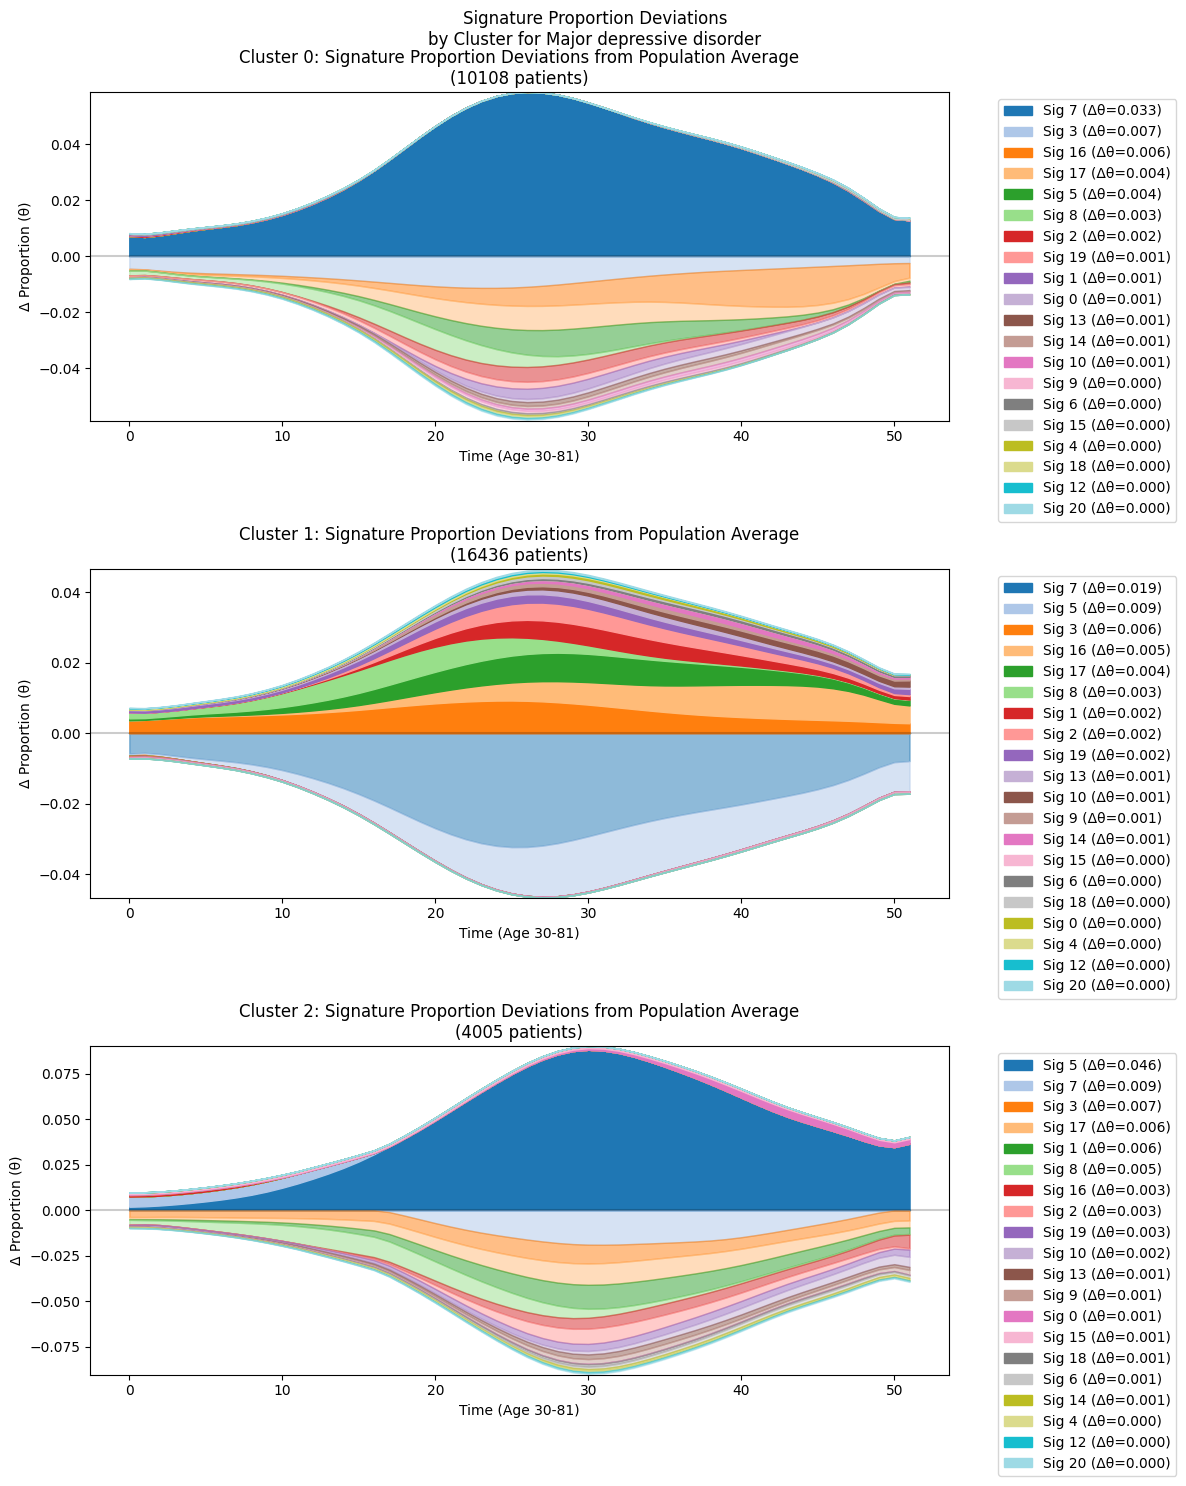

In [3]:
plot_disease_signature_clusters_all_batches(
    disease_idx=17,n_batches=40,
    output_path='disease_clusters_BC.pdf'
)

plot_disease_signature_clusters_all_batches(
    disease_idx=66,n_batches=40,
    output_path='disease_clusters_MDD.pdf'
)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

tab20 = plt.get_cmap('tab20', 20)
for i in range(tab20.N):
    rgba = tab20(i)
    print(mpl.colors.rgb2hex(rgba))

#1f77b4
#aec7e8
#ff7f0e
#ffbb78
#2ca02c
#98df8a
#d62728
#ff9896
#9467bd
#c5b0d5
#8c564b
#c49c94
#e377c2
#f7b6d2
#7f7f7f
#c7c7c7
#bcbd22
#dbdb8d
#17becf
#9edae5


Starting analysis for disease 112 across all batches...

Loading batch 1 model for reference...
Analyzing Myocardial infarction

Processing batch 1/40 (patients 0-10000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig3_utils.py:1335: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyS

Found 635 patients in batch 1

Processing batch 2/40 (patients 10000-20000)
Found 628 patients in batch 2

Processing batch 3/40 (patients 20000-30000)
Found 617 patients in batch 3

Processing batch 4/40 (patients 30000-40000)
Found 601 patients in batch 4

Processing batch 5/40 (patients 40000-50000)
Found 663 patients in batch 5

Processing batch 6/40 (patients 50000-60000)
Found 624 patients in batch 6

Processing batch 7/40 (patients 60000-70000)
Found 613 patients in batch 7

Processing batch 8/40 (patients 70000-80000)
Found 605 patients in batch 8

Processing batch 9/40 (patients 80000-90000)
Found 614 patients in batch 9

Processing batch 10/40 (patients 90000-100000)
Found 592 patients in batch 10

Processing batch 11/40 (patients 100000-110000)
Found 637 patients in batch 11

Processing batch 12/40 (patients 110000-120000)
Found 604 patients in batch 12

Processing batch 13/40 (patients 120000-130000)
Found 613 patients in batch 13

Processing batch 14/40 (patients 130000-14

/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved figure to disease_clusters_MI.pdf


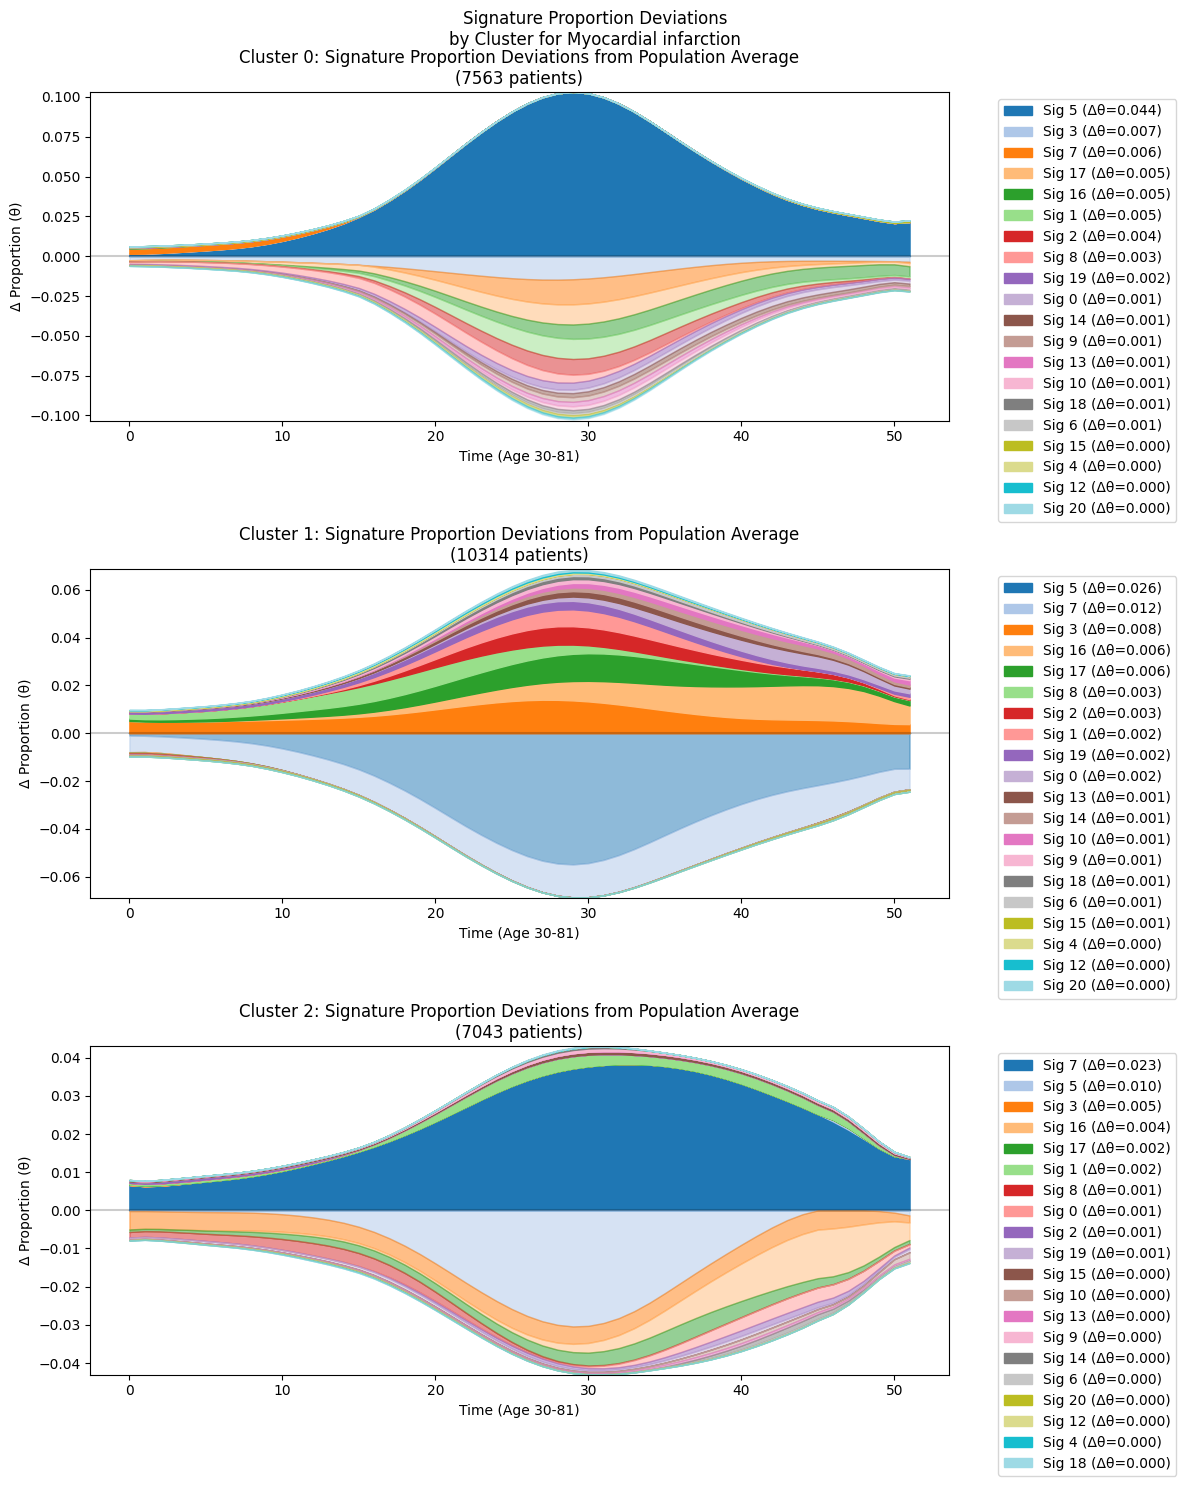

In [2]:
plot_disease_signature_clusters_all_batches(
    disease_idx=112,n_batches=40,
    output_path='disease_clusters_MI.pdf'
)

In [42]:
   # Panel A: Patient example

target_diseases = [114]  # MI since that's what's shown in panel C
min_cond = 1  # Just looking for this specific patient
n_plots = 1  # Just one example patient
patient_id = 43672  # The specific patient we want

essentials_dict, figures_list = plot_multi_morbid_dynamics_from_batches(
    results_base_dir=results_dir,
    target_disease_indices=[43672],  # Looking for this specific patient
    signature_refs_path=sig_refs_file,
    min_conditions=1,  # Just want this patient regardless of conditions
    n_patients_to_plot=1,  # Just one patient
    require_all_targets=True  # Make sure we get this exact patient
)




--- Loading External Signature References from: /Users/sarahurbut/Dropbox/data_for_running/reference_trajectories.pt ---
  Successfully loaded signature_refs with shape: (20, 52)
Searching for batch directories in: /Users/sarahurbut/Dropbox/resultshighamp/results/

--- Loading Model Structure Data from First Batch: /Users/sarahurbut/Dropbox/resultshighamp/results/output_0_10000/model.pt ---
  Model shapes: Psi (21x348), Lambda T (52), Lambda K (21)
  K mismatch explained: signature_refs K=20, model K=21 - the model has a healthy signature.
  Will use signature_refs for K disease signatures and add constant -5.0 for the healthy signature.
Attempting to load disease names...
  Found 'disease_names' with type: <class 'pandas.core.frame.DataFrame'>
  Detected DataFrame. Using first column ('0'). Shape: (348, 1)
  Successfully processed 348 raw names.
  Successfully loaded and validated 348 disease names.

Determining primary signatures for ALL diseases (using reference Psi):
  Mapped all 

/Users/sarahurbut/aladynoulli2/pyScripts/fig3_utils.py:174: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  refs_data = torch.load(signature_refs_path, map_location='cpu')
/Us


No patients found meeting criteria:
- All target diseases [43672]
- At least 1 total conditions
Scanned 400,000 patients total.


In [43]:
# Calculate which batch would contain patient 43672
batch_size = 10000  # Based on your directory structure
batch_number = 43672 // batch_size  # Integer division
start_idx = batch_number * batch_size
end_idx = (batch_number + 1) * batch_size

print(f"Patient 43672 should be in batch output_{start_idx}_{end_idx}")

Patient 43672 should be in batch output_40000_50000


In [ ]:

# Panel C: Disease risk breakdown
visualize_disease_contribution_breakdown(
   lambda_values_np=lambda_values_np,
   phi_values_np=phi_values_np,
   individual_idx=100,  # We'll need to find this for 43672
   disease_idx=114,  # MI
   disease_name="Myocardial Infarction",
   time_points=np.arange(30, 30 + 52),
   output_path='panel_C.pdf')


Saved figure to panel_C.pdf


In [ ]:

# Panel C: Disease risk breakdown
visualize_disease_contribution_breakdown(
   lambda_values_np=lambda_values_np,
   phi_values_np=phi_values_np,
   individual_idx=100,  # We'll need to find this for 43672
   disease_idx=114,  # MI
   disease_name="Myocardial Infarction",
   time_points=np.arange(30, 30 + 52),
   output_path='panel_C.pdf')


Saved figure to panel_C.pdf


In [ ]:

# Panel C: Disease risk breakdown
visualize_disease_contribution_breakdown(
   lambda_values_np=lambda_values_np,
   phi_values_np=phi_values_np,
   individual_idx=100,  # We'll need to find this for 43672
   disease_idx=114,  # MI
   disease_name="Myocardial Infarction",
   time_points=np.arange(30, 30 + 52),
   output_path='panel_C.pdf')


Saved figure to panel_C.pdf


In [ ]:

# Panel C: Disease risk breakdown
visualize_disease_contribution_breakdown(
   lambda_values_np=lambda_values_np,
   phi_values_np=phi_values_np,
   individual_idx=100,  # We'll need to find this for 43672
   disease_idx=114,  # MI
   disease_name="Myocardial Infarction",
   time_points=np.arange(30, 30 + 52),
   output_path='panel_C.pdf')


Saved figure to panel_C.pdf


In [ ]:

# Panel C: Disease risk breakdown
visualize_disease_contribution_breakdown(
   lambda_values_np=lambda_values_np,
   phi_values_np=phi_values_np,
   individual_idx=100,  # We'll need to find this for 43672
   disease_idx=114,  # MI
   disease_name="Myocardial Infarction",
   time_points=np.arange(30, 30 + 52),
   output_path='panel_C.pdf')


Saved figure to panel_C.pdf


In [ ]:

# Panel C: Disease risk breakdown
visualize_disease_contribution_breakdown(
   lambda_values_np=lambda_values_np,
   phi_values_np=phi_values_np,
   individual_idx=100,  # We'll need to find this for 43672
   disease_idx=114,  # MI
   disease_name="Myocardial Infarction",
   time_points=np.arange(30, 30 + 52),
   output_path='panel_C.pdf')


Saved figure to panel_C.pdf


In [2]:
from fig3_utils import *
# Use it like this:
batch_path = '/Users/sarahurbut/Dropbox/resultshighamp/results/output_40000_50000/model.pt'
sig_refs_path = '/Users/sarahurbut/Dropbox/data_for_running/reference_trajectories.pt'
local_idx = 43672 - 40000
import os
print(f"Model exists: {os.path.exists(batch_path)}")
print(f"References exist: {os.path.exists(sig_refs_path)}")

Model exists: True
References exist: True


In [3]:
import torch
model = torch.load(batch_path)
refs = torch.load(sig_refs_path)
print(f"Local index being used: {local_idx}")
# Print some information about the loaded data
print("Model keys:", model.keys() if isinstance(model, dict) else "Not a dict")
print("References shape:", refs.shape if hasattr(refs, 'shape') else "No shape attribute")

Local index being used: 3672
Model keys: dict_keys(['model_state_dict', 'clusters', 'initial_state', 'Y', 'prevalence_t', 'logit_prevalence_t', 'G', 'E', 'indices', 'disease_names', 'hyperparameters'])
References shape: No shape attribute


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_11343/4056743344.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(batch_path)
/var/folders/f

In [4]:
refs = torch.load(sig_refs_path)
print("Type of refs:", type(refs))
print("Content structure of refs:", refs.keys() if isinstance(refs, dict) else "Contents:")

Type of refs: <class 'dict'>
Content structure of refs: dict_keys(['signature_refs', 'healthy_ref'])


/var/folders/fl/ng5crz0x0fnb6c6x8dk7tfth0000gn/T/ipykernel_11343/3669265508.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  refs = torch.load(sig_refs_path)


In [3]:
from fig3_utils import *
# Use it like this:
batch_path = '/Users/sarahurbut/Dropbox/resultshighamp/results/output_40000_50000/model.pt'
sig_refs_path = '/Users/sarahurbut/Dropbox/data_for_running/reference_trajectories.pt'
local_idx = 43672 - 40000
import os
print(f"Model exists: {os.path.exists(batch_path)}")
print(f"References exist: {os.path.exists(sig_refs_path)}")

Model exists: True
References exist: True


/Users/sarahurbut/aladynoulli2/pyScripts/fig3_utils.py:1519: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_data = torch.load(model_path, map_location='cpu')
/Users/sar

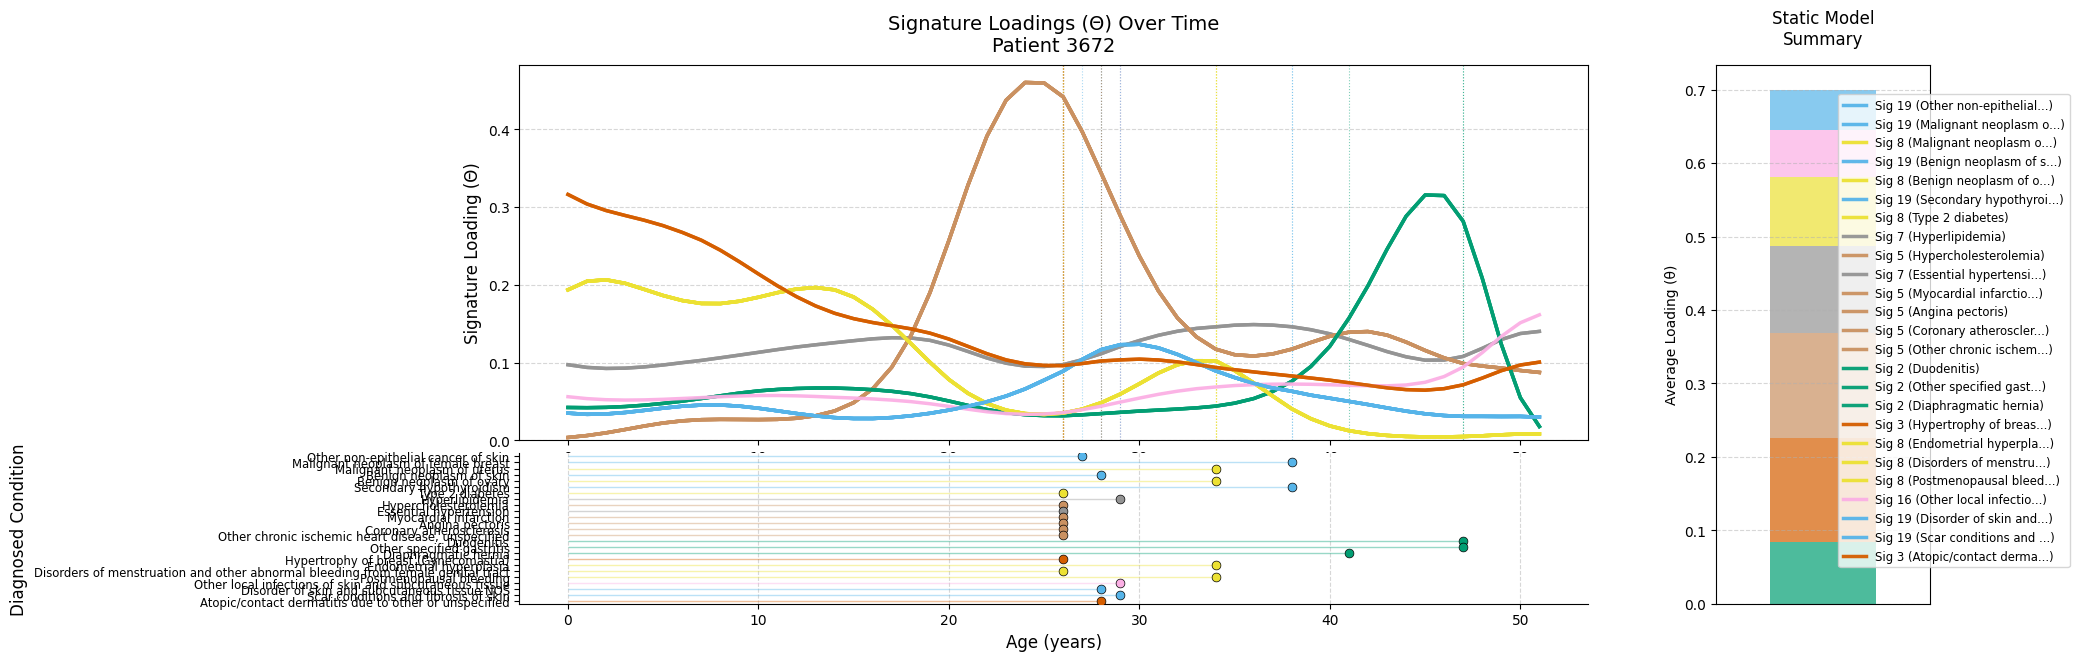

In [4]:

fig = plot_single_patient_dynamics(
    model_path=batch_path,
    patient_idx=local_idx,
    sig_refs_path=sig_refs_path
)
plt.savefig('patient_43672_dynamics.pdf', bbox_inches='tight', dpi=300)

In [ ]:

# Panel C: Disease risk breakdown
visualize_disease_contribution_breakdown(
   lambda_values_np=lambda_values_np,
   phi_values_np=phi_values_np,
   individual_idx=100,  # We'll need to find this for 43672
   disease_idx=114,  # MI
   disease_name="Myocardial Infarction",
   time_points=np.arange(30, 30 + 52),
   output_path='panel_C.pdf')


Saved figure to panel_C.pdf


In [18]:

# Panel C: Disease risk breakdown
visualize_disease_contribution_breakdown(
   lambda_values_np=lambda_values_np,
   phi_values_np=phi_values_np,
   individual_idx=100,  # We'll need to find this for 43672
   disease_idx=114,  # MI
   disease_name="Myocardial Infarction",
   time_points=np.arange(30, 30 + 52),
   output_path='panel_C.pdf')


Saved figure to panel_C.pdf


In [ ]:

# Panel C: Disease risk breakdown
visualize_disease_contribution_breakdown(
   lambda_values_np=lambda_values_np,
   phi_values_np=phi_values_np,
   individual_idx=100,  # We'll need to find this for 43672
   disease_idx=114,  # MI
   disease_name="Myocardial Infarction",
   time_points=np.arange(30, 30 + 52),
   output_path='panel_C.pdf')


Saved figure to panel_C.pdf


Starting analysis for disease 114 across all batches...

Loading batch 1 model for reference...
Analyzing Coronary atherosclerosis

Processing batch 1/10 (patients 0-10000)


/Users/sarahurbut/aladynoulli2/pyScripts/fig3_utils.py:1333: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model1 = torch.load(model_path)
/Users/sarahurbut/aladynoulli2/pyS

Found 847 patients in batch 1

Processing batch 2/10 (patients 10000-20000)
Found 905 patients in batch 2

Processing batch 3/10 (patients 20000-30000)
Found 874 patients in batch 3

Processing batch 4/10 (patients 30000-40000)
Found 927 patients in batch 4

Processing batch 5/10 (patients 40000-50000)
Found 953 patients in batch 5

Processing batch 6/10 (patients 50000-60000)
Found 851 patients in batch 6

Processing batch 7/10 (patients 60000-70000)
Found 892 patients in batch 7

Processing batch 8/10 (patients 70000-80000)
Found 899 patients in batch 8

Processing batch 9/10 (patients 80000-90000)
Found 922 patients in batch 9

Processing batch 10/10 (patients 90000-100000)
Found 902 patients in batch 10

Total patients with Coronary atherosclerosis: 8972
Using population average as reference

Performing clustering with 3 clusters...


/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/opt/miniconda3/envs/new_env_pyro2/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

Saved figure to panel_D.pdf


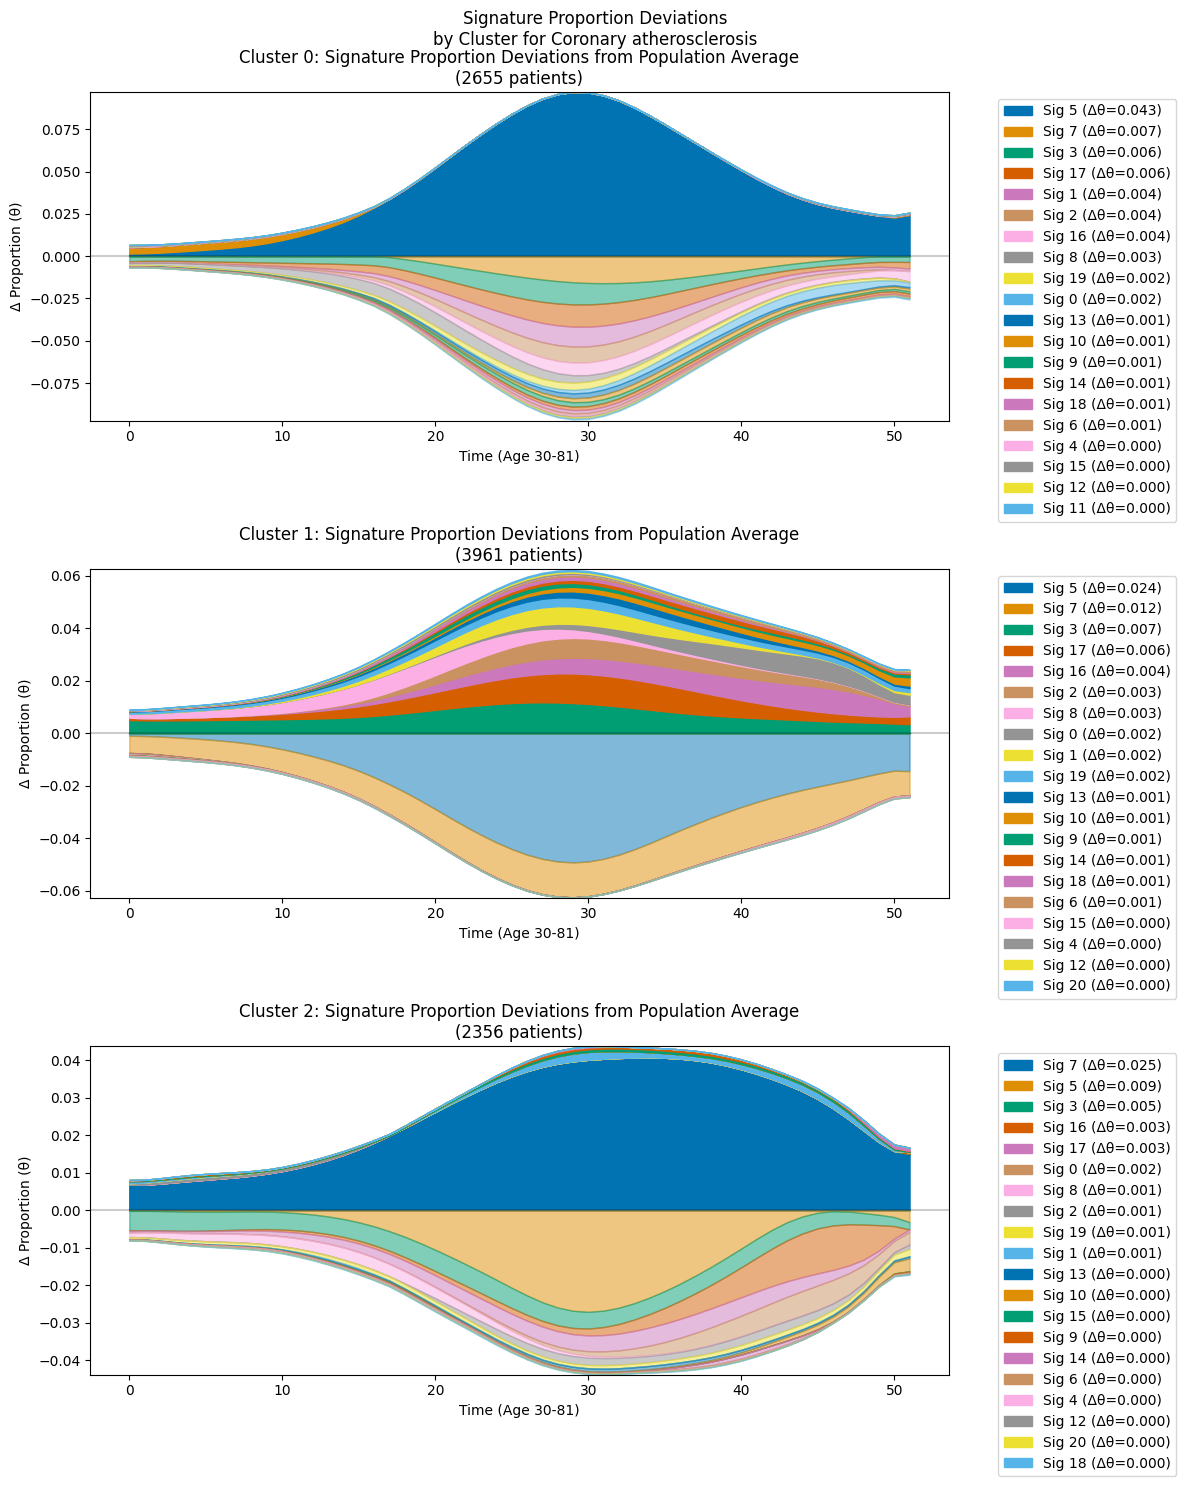

In [ ]:

   # Panel D: Cluster analysis
plot_disease_signature_clusters_all_batches(
   disease_idx=114,  # MI
   n_clusters=3,  # To match your layout showing clusters 0-7
   n_top_sigs=20,
   subtract_reference=True,
   output_path='panel_D.pdf')

/Users/sarahurbut/aladynoulli2/pyScripts/composite_figure_example.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_data = torch.load(model_path, map_location='cpu'

lambda_values shape: (10000, 21, 52)
phi_values shape: (21, 348, 52)
phi_disease shape: (21, 52)
patient_lambda shape: (21, 52)
contributions shape: (21, 52)


NameError: name 'get_signature_colors' is not defined

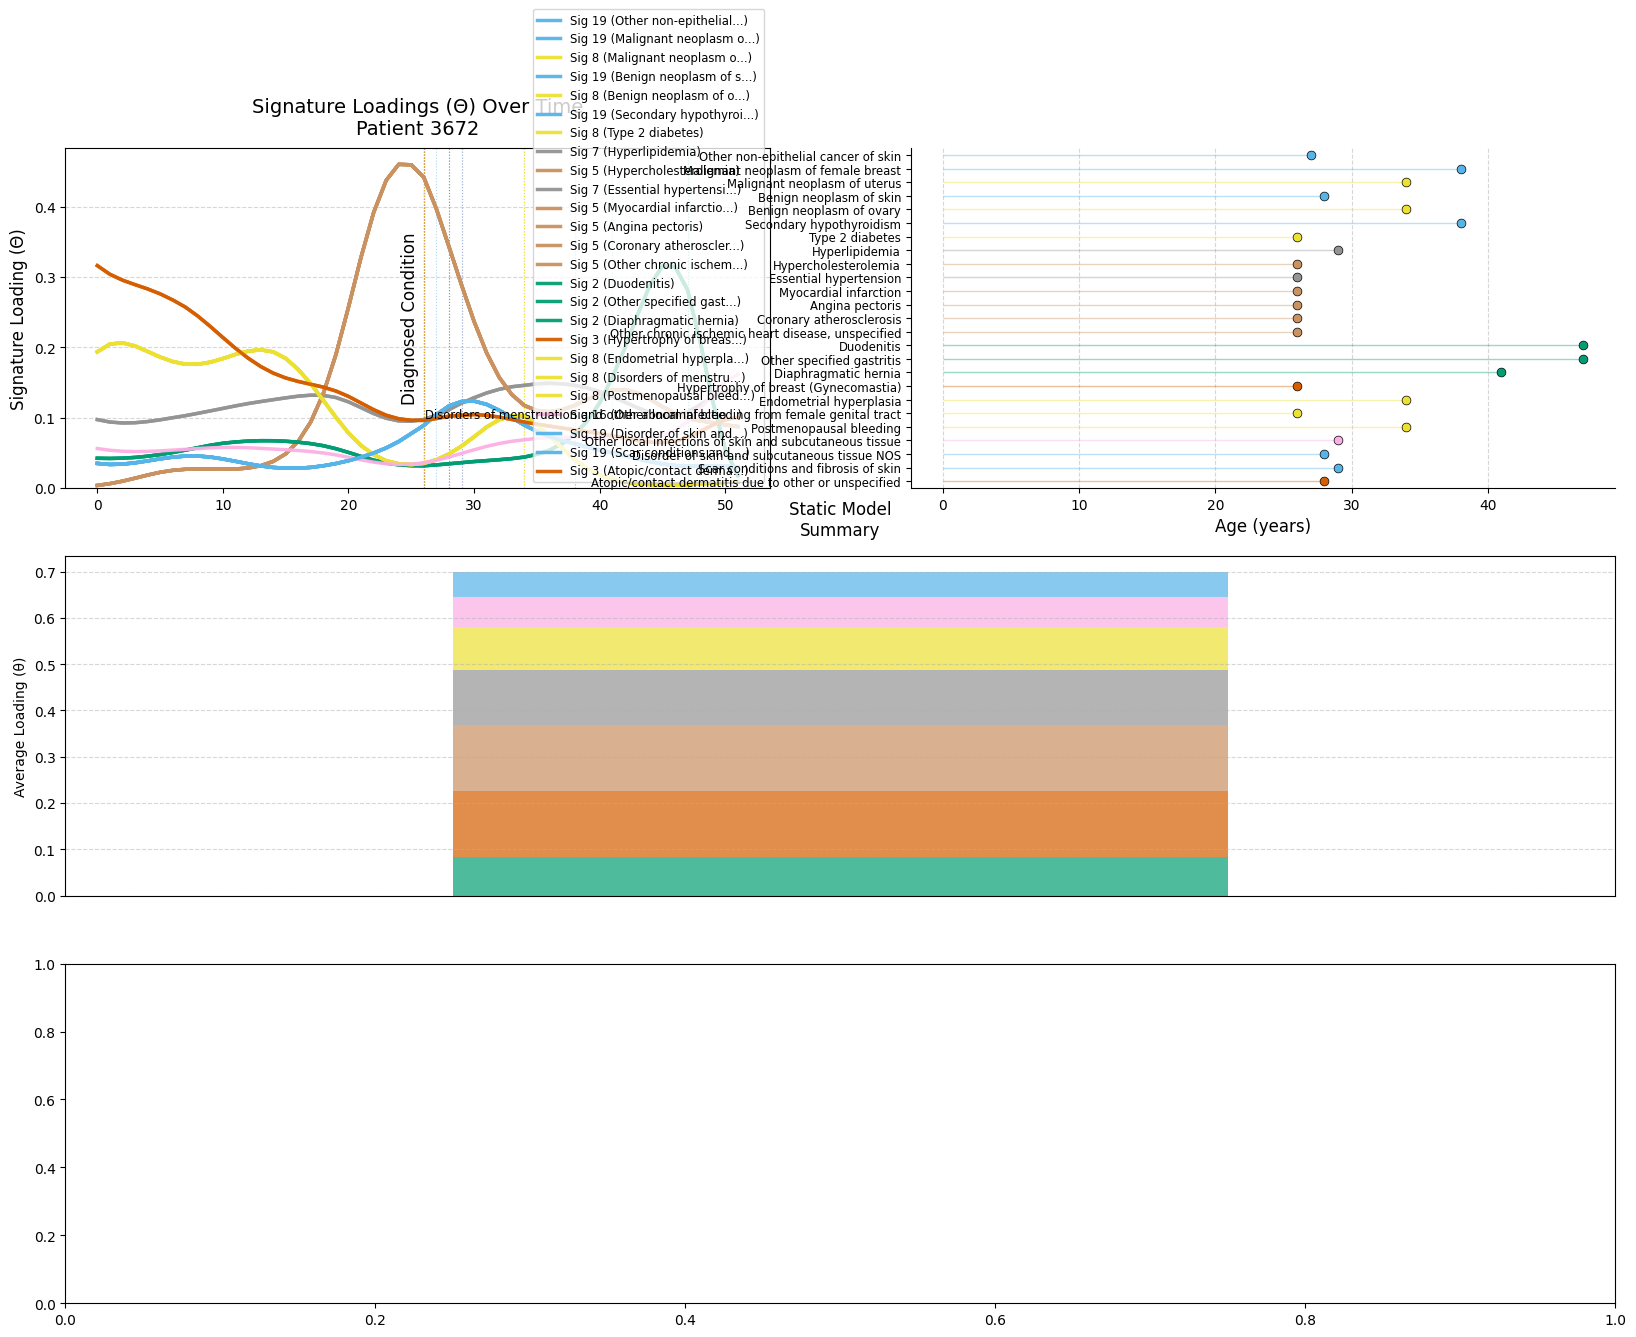

In [28]:
# Set your parameters

import matplotlib.pyplot as plt
from composite_figure_example import create_composite_figure
from fig3_utils import *


model_path = '/Users/sarahurbut/Dropbox/resultshighamp/results/output_40000_50000/model.pt'
sig_refs_path = '/Users/sarahurbut/Dropbox/data_for_running/reference_trajectories.pt'
patient_idx = 43672 - 40000  # Local index within the batch
disease_idx = 1
disease_name = "Myocardial Infarction"
output_path = "composite_figure.png"

# Create and display the composite figure
fig = create_composite_figure(
    model_path=model_path,
    patient_idx=patient_idx,
    disease_idx=disease_idx,
    disease_name=disease_name,
    sig_refs_path=sig_refs_path,
    output_path=output_path
)
plt.show()